# import

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras_tuner import RandomSearch
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
# Завантаження даних
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
origin_dim = x_train.shape[1]

# Нормалізація
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# reshape to flat
x_train_flat = x_train.reshape((len(x_train), -1))
x_test_flat = x_test.reshape((len(x_test), -1))

x_train_flat.shape

(60000, 784)

In [3]:
# AE
def create_autoencoder(hp):
    lat_dim_ae = hp.Int('lat_dim', min_value=4, max_value=40, step=4)
    inputs = tf.keras.layers.Input(shape=(784,))
    encoded = tf.keras.layers.Dense(128, activation='relu')(inputs)
    encoded = tf.keras.layers.Dense(lat_dim_ae, activation='relu')(encoded)
    decoded = tf.keras.layers.Dense(128, activation='relu')(encoded)
    decoded = tf.keras.layers.Dense(784, activation='sigmoid')(decoded)

    autoencoder = tf.keras.Model(inputs, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder

# Grig Search

## svd

In [4]:
steps = [
         ('SVD', TruncatedSVD()),
         ('MLP', MLPClassifier())]
pipeline = Pipeline(steps)

param_grid = {
    'SVD__n_components': list(range(10,200,10)),
}

grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=3, scoring='accuracy', return_train_score=True, verbose=2)
grid_search.fit(x_train_flat, y_train)

results = pd.DataFrame(grid_search.cv_results_)
results

Fitting 3 folds for each of 19 candidates, totalling 57 fits


c:\Program Files\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ...............................SVD__n_components=10; total time=  21.5s


c:\Program Files\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ...............................SVD__n_components=10; total time=  21.4s


c:\Program Files\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ...............................SVD__n_components=10; total time=  21.4s


c:\Program Files\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ...............................SVD__n_components=20; total time=  31.1s


c:\Program Files\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ...............................SVD__n_components=20; total time=  31.1s


c:\Program Files\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ...............................SVD__n_components=20; total time=  31.2s


c:\Program Files\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ...............................SVD__n_components=30; total time=  31.4s


c:\Program Files\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ...............................SVD__n_components=30; total time=  31.7s


c:\Program Files\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ...............................SVD__n_components=30; total time=  31.4s
[CV] END ...............................SVD__n_components=40; total time=  26.8s
[CV] END ...............................SVD__n_components=40; total time=  26.9s
[CV] END ...............................SVD__n_components=40; total time=  24.6s
[CV] END ...............................SVD__n_components=50; total time=  22.5s
[CV] END ...............................SVD__n_components=50; total time=  20.7s
[CV] END ...............................SVD__n_components=50; total time=  20.4s
[CV] END ...............................SVD__n_components=60; total time=  17.9s
[CV] END ...............................SVD__n_components=60; total time=  17.9s
[CV] END ...............................SVD__n_components=60; total time=  17.0s
[CV] END ...............................SVD__n_components=70; total time=  17.0s
[CV] END ...............................SVD__n_components=70; total time=  16.2s
[CV] END ...................

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_SVD__n_components,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,21.523283,0.049158,0.033667,0.001700,10,{'SVD__n_components': 10},0.93040,0.93245,0.93120,0.931350,0.000844,19,0.945550,0.947825,0.948125,0.947167,0.001150
1,31.161907,0.041315,0.036000,0.000815,20,{'SVD__n_components': 20},0.96860,0.96490,0.96640,0.966633,0.001520,18,0.992175,0.992225,0.993650,0.992683,0.000684
2,31.537595,0.154530,0.037007,0.000817,30,{'SVD__n_components': 30},0.97255,0.97010,0.97060,0.971083,0.001057,16,0.999825,0.999850,0.999925,0.999867,0.000042
3,26.153656,1.045744,0.036332,0.000943,40,{'SVD__n_components': 40},0.97200,0.97275,0.97165,0.972133,0.000459,10,0.999825,1.000000,1.000000,0.999942,0.000082
4,21.277726,0.934951,0.042001,0.000817,50,{'SVD__n_components': 50},0.97470,0.97215,0.97285,0.973233,0.001076,5,0.999950,1.000000,1.000000,0.999983,0.000024
5,17.664970,0.416578,0.042664,0.001248,60,{'SVD__n_components': 60},0.97380,0.97265,0.97310,0.973183,0.000473,6,1.000000,1.000000,1.000000,1.000000,0.000000
6,16.986724,0.553214,0.043571,0.001017,70,{'SVD__n_components': 70},0.97430,0.97360,0.97270,0.973533,0.000655,2,1.000000,1.000000,1.000000,1.000000,0.000000
7,14.387250,0.384418,0.044667,0.001885,80,{'SVD__n_components': 80},0.97445,0.97465,0.97315,0.974083,0.000665,1,1.000000,1.000000,0.999900,0.999967,0.000047
8,14.238515,0.659776,0.045335,0.000471,90,{'SVD__n_components': 90},0.97340,0.97235,0.97450,0.973417,0.000878,4,1.000000,1.000000,1.000000,1.000000,0.000000
9,14.785985,0.615449,0.064778,0.011675,100,{'SVD__n_components': 100},0.97305,0.97270,0.97485,0.973533,0.000942,3,1.000000,1.000000,1.000000,1.000000,0.000000


In [5]:
results2 = results[['param_SVD__n_components', 'mean_test_score', 'rank_test_score', 'mean_fit_time', 'mean_score_time']]
results2

,param_SVD__n_components,mean_test_score,rank_test_score,mean_fit_time,mean_score_time
0,10,0.931350,19,21.523283,0.033667
1,20,0.966633,18,31.161907,0.036000
2,30,0.971083,16,31.537595,0.037007
3,40,0.972133,10,26.153656,0.036332
4,50,0.973233,5,21.277726,0.042001
5,60,0.973183,6,17.664970,0.042664
6,70,0.973533,2,16.986724,0.043571
7,80,0.974083,1,14.387250,0.044667
8,90,0.973417,4,14.238515,0.045335
9,100,0.973533,3,14.785985,0.064778


## AE

In [10]:
# autoencoder = KerasRegressor(build_fn=create_autoencoder, verbose=0)

param_grid = dict(lat_dim=[10, 15, 20, 30, 40])
# grid = GridSearchCV(estimator=autoencoder, param_grid=param_grid, cv=3, scoring='accuracy', return_train_score=True, verbose=2)

tuner = RandomSearch(
    create_autoencoder,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='autoencoders')

# Пошук найкращих гіперпараметрів
tuner.search(x_train_flat, x_train_flat, epochs=15, validation_data=(x_test_flat, x_test_flat))

# Отримання найкращої моделі
best_model = tuner.get_best_models(num_models=1)[0]

Trial 5 Complete [00h 03m 24s]
val_loss: 0.007061885514607032

Best val_loss So Far: 0.006121774359295766
Total elapsed time: 00h 16m 47s


c:\Program Files\Python311\Lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [11]:
tuner.results_summary()

Results summary
Results in my_dir\autoencoders
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 3 summary
Hyperparameters:
lat_dim: 40
Score: 0.006121774359295766

Trial 4 summary
Hyperparameters:
lat_dim: 32
Score: 0.007061885514607032

Trial 1 summary
Hyperparameters:
lat_dim: 20
Score: 0.010206700613101324

Trial 0 summary
Hyperparameters:
lat_dim: 12
Score: 0.014960265718400478

Trial 2 summary
Hyperparameters:
lat_dim: 8
Score: 0.019947337607542675


In [12]:
results = pd.DataFrame(tuner.oracle.get_best_trials(num_trials=len(tuner.oracle.trials)))
results

,0
0,<keras_tuner.src.engine.trial.Trial object at ...
1,<keras_tuner.src.engine.trial.Trial object at ...
2,<keras_tuner.src.engine.trial.Trial object at ...
3,<keras_tuner.src.engine.trial.Trial object at ...
4,<keras_tuner.src.engine.trial.Trial object at ...


## charts

### svd

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


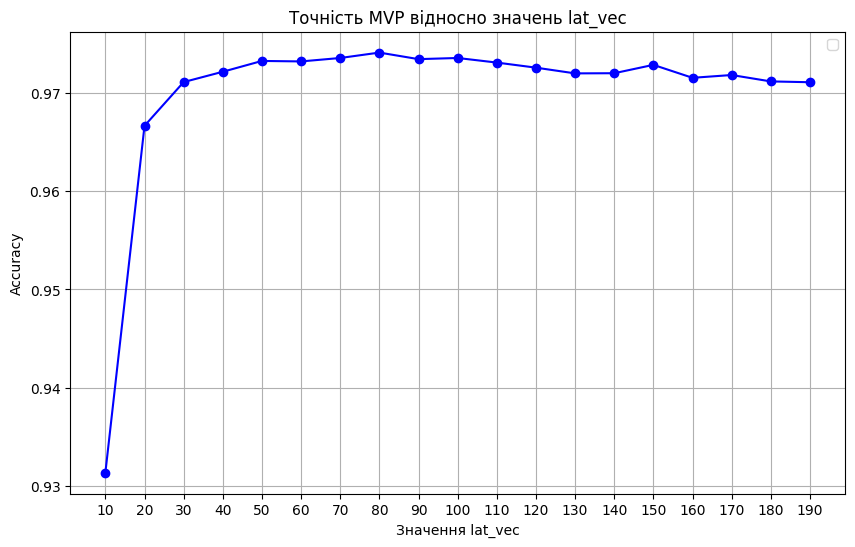

In [6]:
plt.figure(figsize=(10, 6))

plt.plot(results[['param_SVD__n_components']], results[['mean_test_score']], marker='o', color='blue')

plt.xlabel('Значення lat_vec')
plt.ylabel('Accuracy')
plt.title('Точність MVP відносно значень lat_vec')
plt.xticks(results['param_SVD__n_components'].tolist())
plt.grid(True)
plt.legend()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


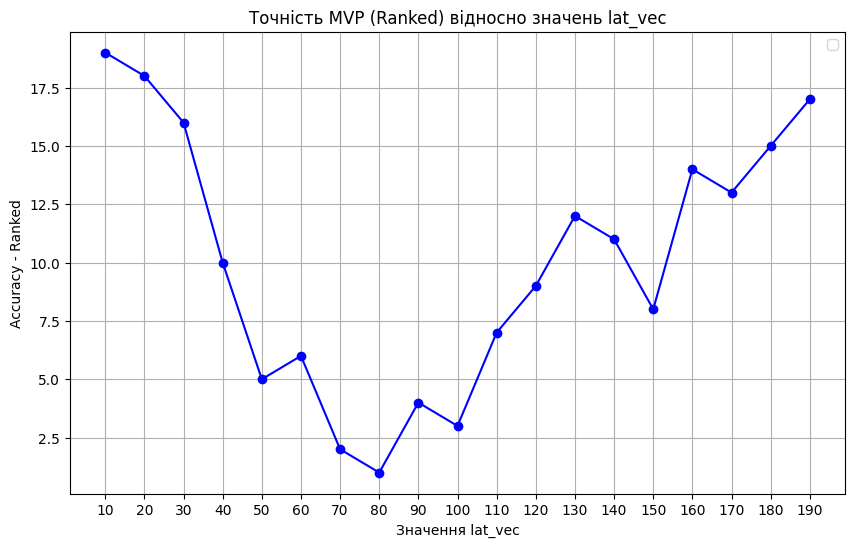

In [7]:
plt.figure(figsize=(10, 6))

plt.plot(results[['param_SVD__n_components']], results[['rank_test_score']], marker='o', color='blue')

plt.xlabel('Значення lat_vec')
plt.ylabel('Accuracy - Ranked')
plt.title('Точність MVP (Ranked) відносно значень lat_vec')
plt.xticks(results['param_SVD__n_components'].tolist())
plt.grid(True)
plt.legend()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


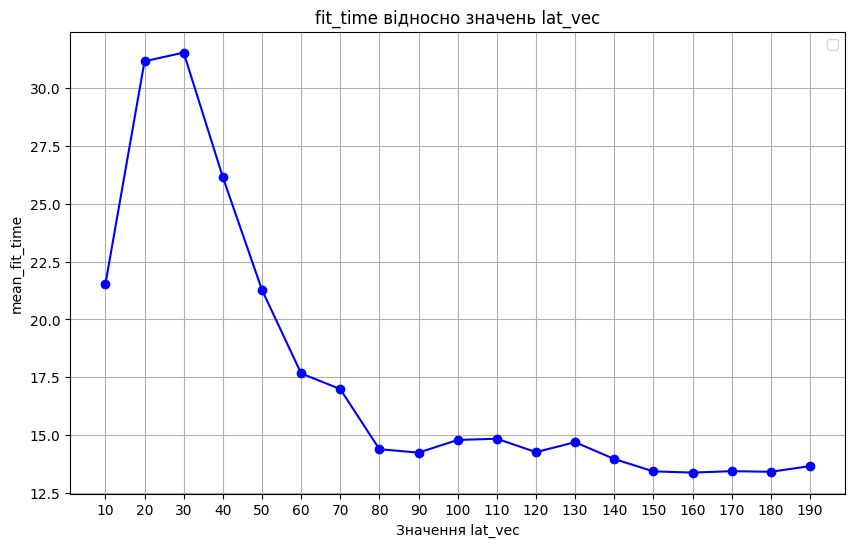

In [8]:
plt.figure(figsize=(10, 6))

plt.plot(results[['param_SVD__n_components']], results[['mean_fit_time']], marker='o', color='blue')

plt.xlabel('Значення lat_vec')
plt.ylabel('mean_fit_time')
plt.title('fit_time відносно значень lat_vec')
plt.xticks(results['param_SVD__n_components'].tolist())
plt.grid(True)
plt.legend()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


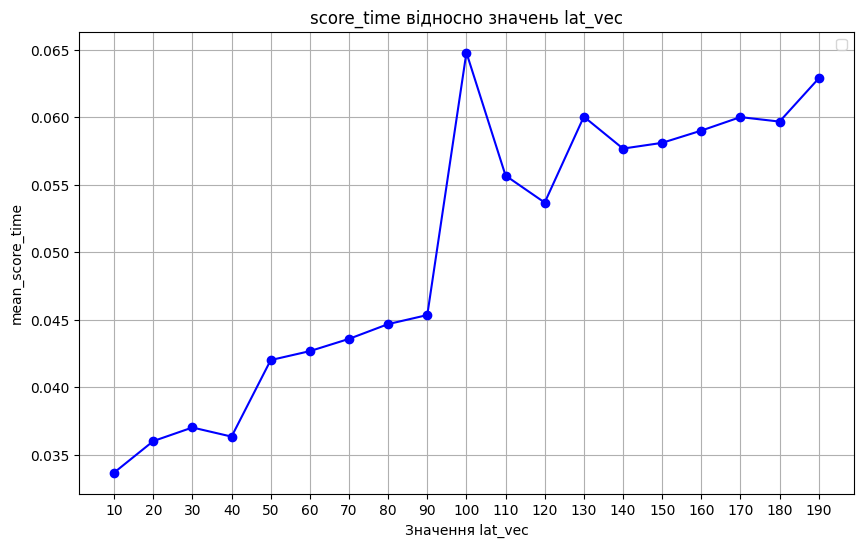

In [9]:
plt.figure(figsize=(10, 6))

plt.plot(results[['param_SVD__n_components']], results[['mean_score_time']], marker='o', color='blue')

plt.xlabel('Значення lat_vec')
plt.ylabel('mean_score_time')
plt.title('score_time відносно значень lat_vec')
plt.xticks(results['param_SVD__n_components'].tolist())
plt.grid(True)
plt.legend()

plt.show()

### AE - custom

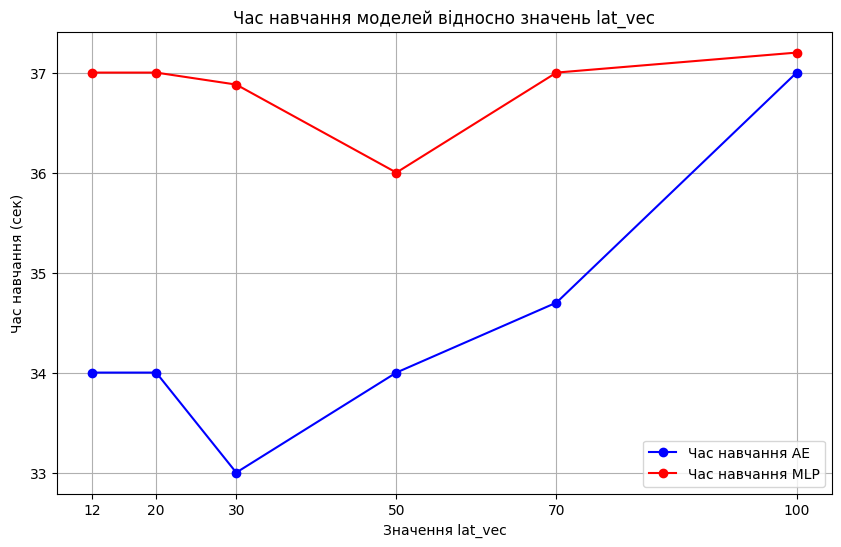

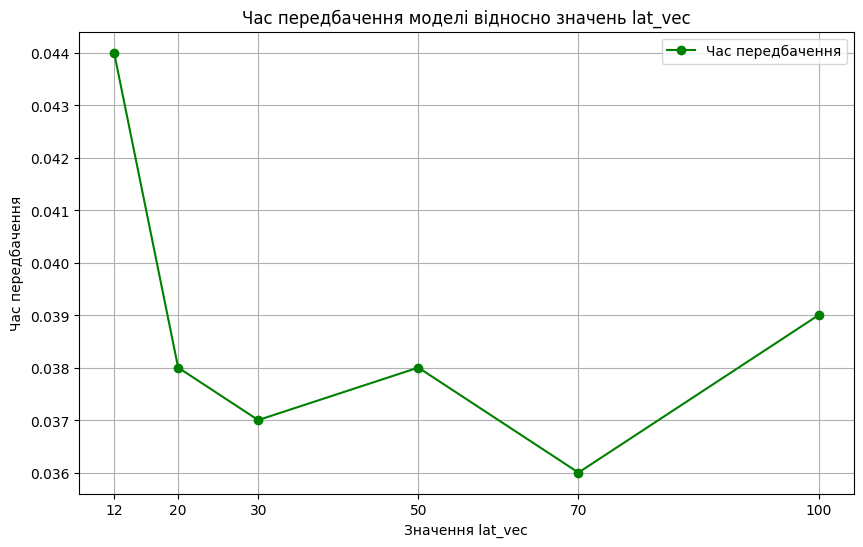

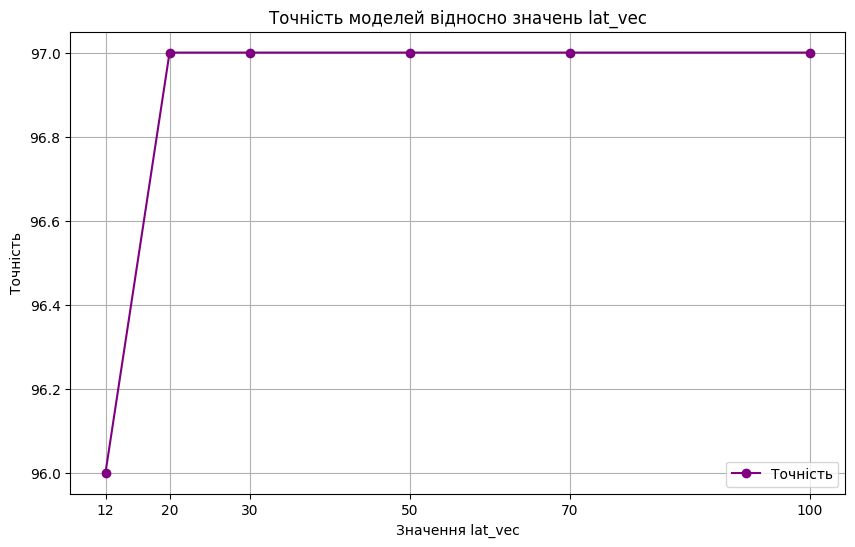

In [ ]:
import matplotlib.pyplot as plt

# Значення параметрів
lat_vec =           [12, 20, 30, 50, 70, 100]
ae_training_time =  [34, 34, 33, 34, 34.7, 37]  # Час навчання AE
mlp_training_time = [37, 37, 36.88, 36, 37, 37.2]  # Час навчання MLP
prediction_time =   [0.044, 0.038, 0.037, 0.038, 0.036, 0.039]  # Час передбачення
accuracy =          [96, 97, 97, 97, 97, 97]  # Точність

# Побудова графіку для часу навчання AE та MLP
plt.figure(figsize=(10, 6))

plt.plot(lat_vec, ae_training_time, marker='o', color='blue', label='Час навчання AE')
plt.plot(lat_vec, mlp_training_time, marker='o', color='red', label='Час навчання MLP')

plt.xlabel('Значення lat_vec')
plt.ylabel('Час навчання (сек)')
plt.title('Час навчання моделей відносно значень lat_vec')
plt.xticks(lat_vec)
plt.grid(True)
plt.legend()

plt.show()

# Побудова графіку для часу передбачення
plt.figure(figsize=(10, 6))

plt.plot(lat_vec, prediction_time, marker='o', color='green', label='Час передбачення')

plt.xlabel('Значення lat_vec')
plt.ylabel('Час передбачення')
plt.title('Час передбачення моделі відносно значень lat_vec')
plt.xticks(lat_vec)
plt.grid(True)
plt.legend()

plt.show()

# Побудова графіку для точності
plt.figure(figsize=(10, 6))


plt.plot(lat_vec, accuracy, marker='o', color='purple', label='Точність')

plt.xlabel('Значення lat_vec')
plt.ylabel('Точність')
plt.title('Точність моделей відносно значень lat_vec')
plt.xticks(lat_vec)
plt.grid(True)
plt.legend()

plt.show()
